## 处理行业roe数据
- 通过回溯历史数据来验证mark有效性
- 更改mark判断规则，考虑不是用单个roe点而是用最后没有取到的多个点？ 
- 验证有效后得到几个行业的数据

In [1]:
import sys
sys.path.append("..")
import roeProcessTools as tl
import pandas as pd
import numpy as np
from random import sample

In [2]:
dirPath = "/Users/zch/Desktop/internship/data/"
chemPath = "化工roe.xlsx"
machPath = "机械设备roe.xlsx"
elecPath = "电子roe.xlsx"
foodPath = "食品饮料roe.xlsx"

In [3]:
machRoe = pd.read_excel(dirPath+machPath)
machRoe = tl.clean(machRoe)
# machRoe.to_excel(dirPath+"machRoeClean.xlsx", index=False)
# machRoe.head()

In [4]:
machRoe = tl.greaterThanStd(machRoe)
machRoe = tl.selectGood(machRoe, n=1.5, minExtreme=4, proportion=0.2)
# machRoe.to_excel(dirPath+"machSelected.xlsx", index=False)

In [5]:
machMarked = tl.markCompanies(machRoe)
# machMarked.to_excel(dirPath+"machMarked.xlsx", index=False)

In [6]:
machMarked

,code,name,mark
0,000039.SZ,中集集团,D*
1,000157.SZ,中联重科,I
2,000528.SZ,柳工,I
3,000584.SZ,哈工智能,D
4,000680.SZ,山推股份,D
5,000852.SZ,石化机械,D
6,000856.SZ,冀东装备,D
7,000976.SZ,华铁股份,H
8,002006.SZ,精功科技,D*
9,002046.SZ,国机精工,H


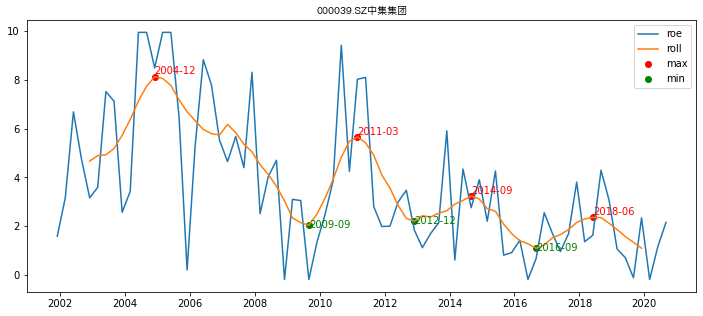

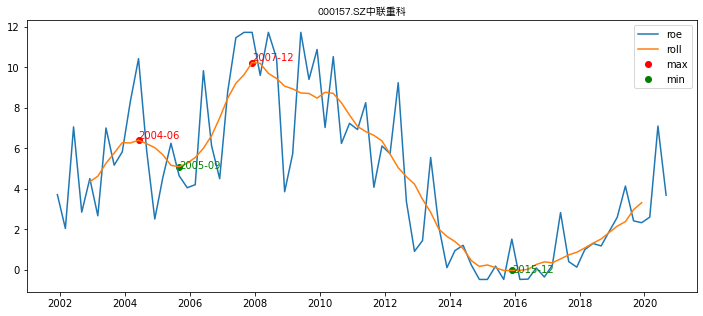

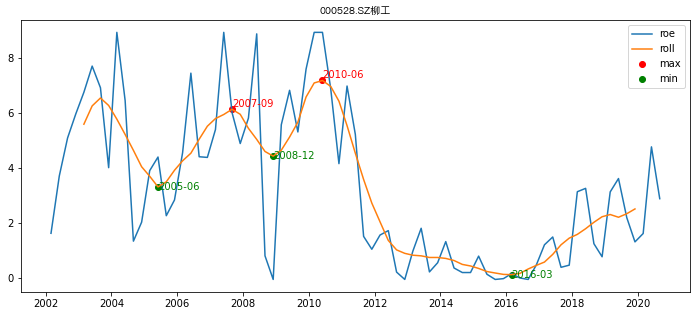

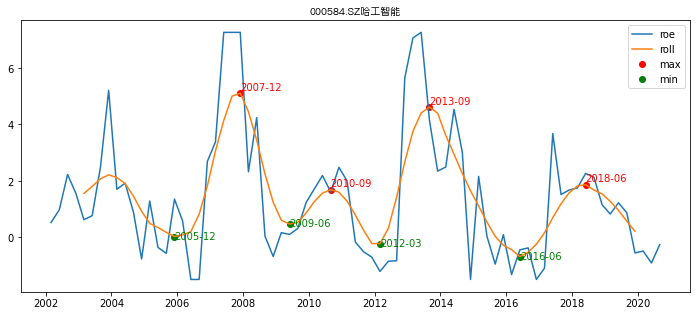

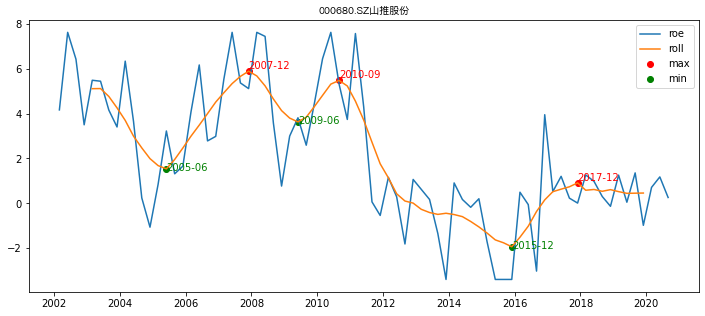

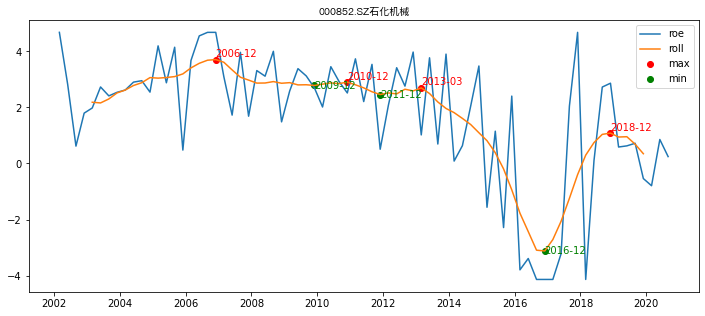

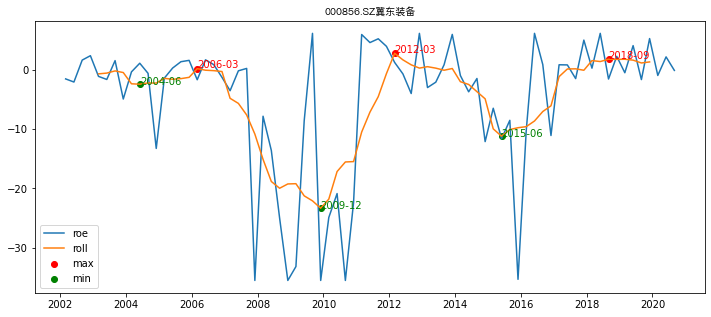

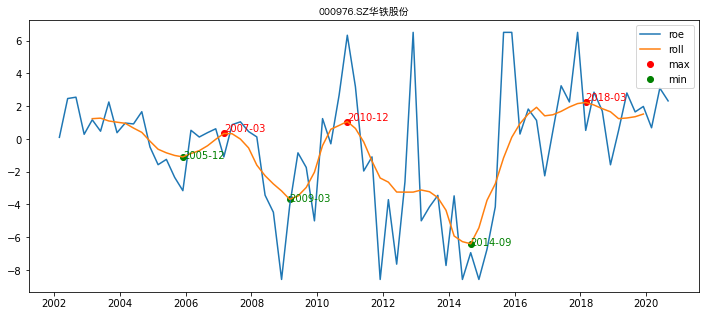

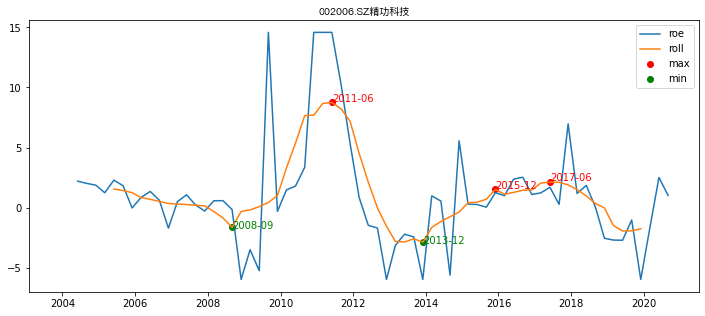

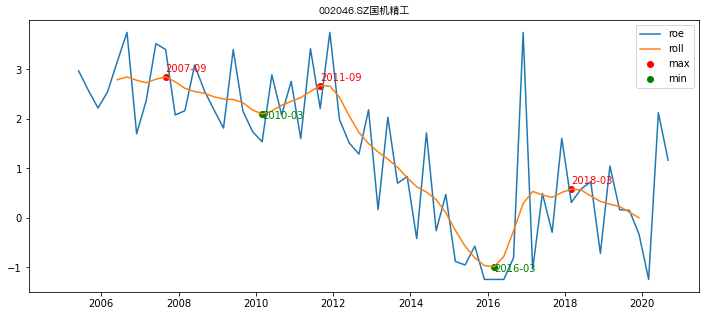

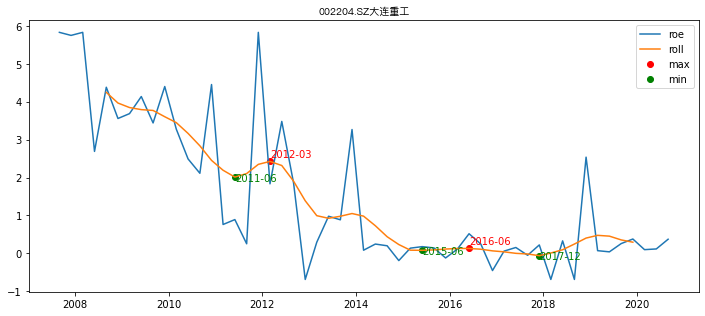

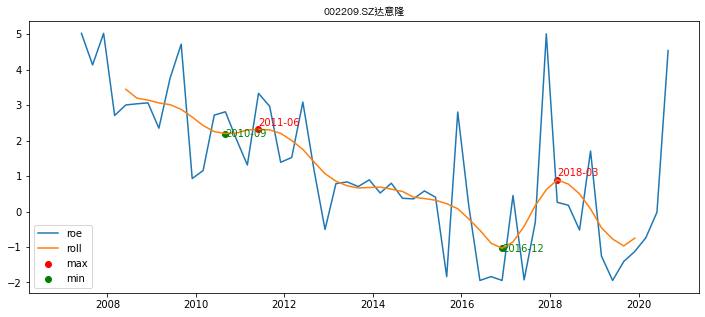

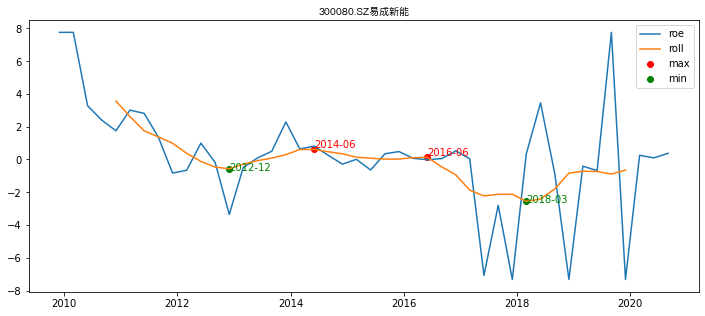

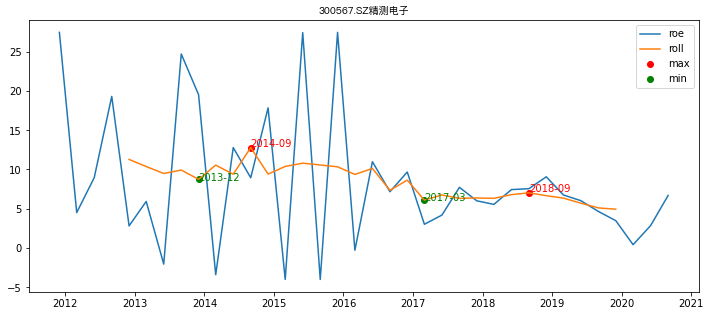

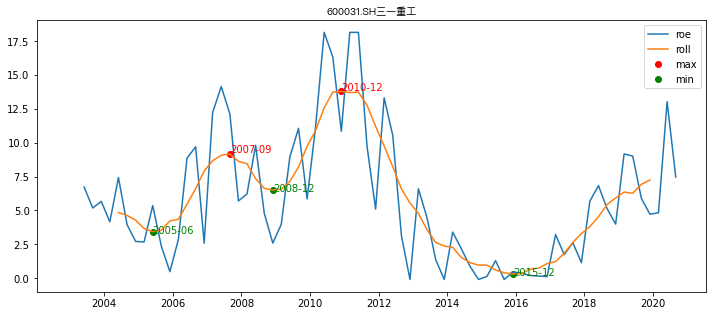

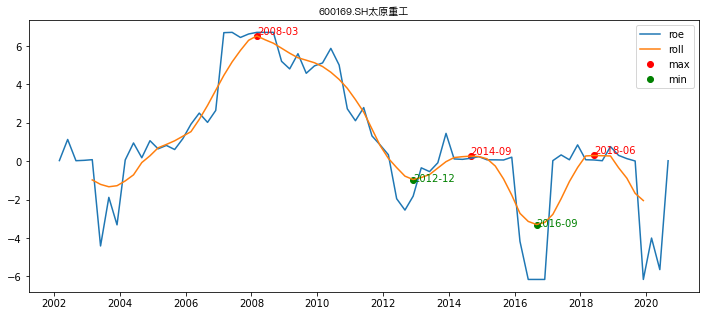

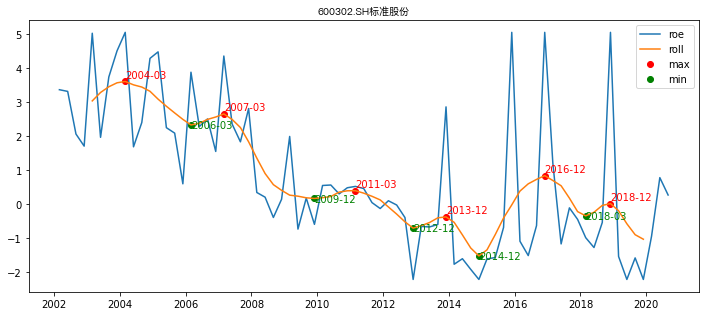

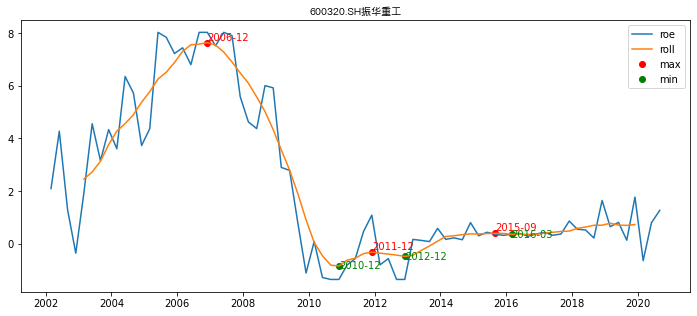

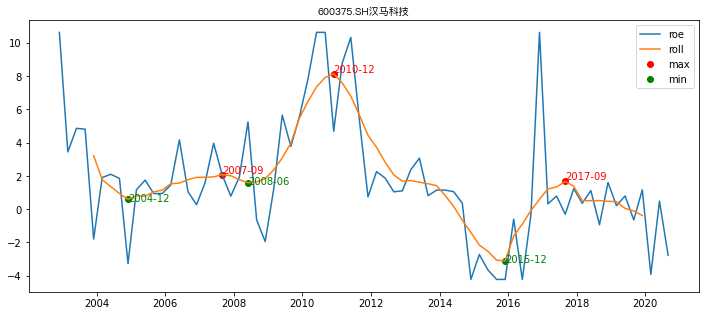

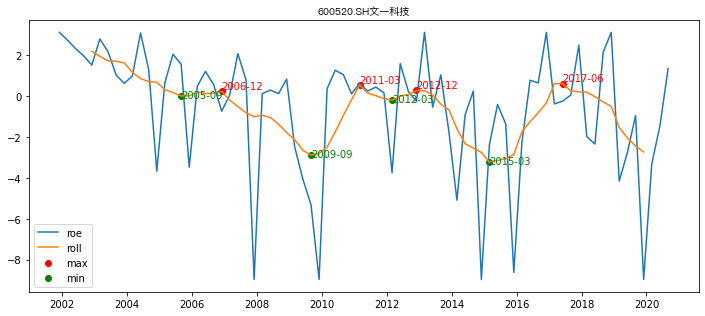

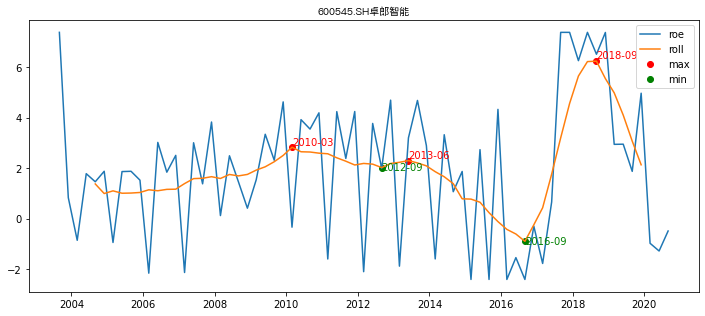

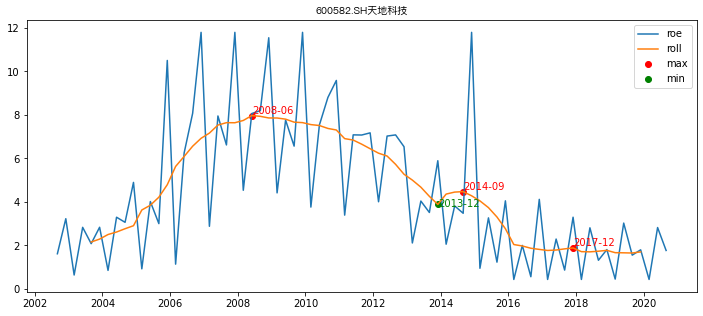

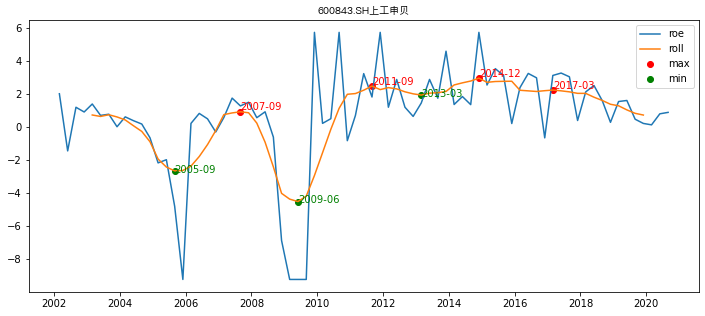

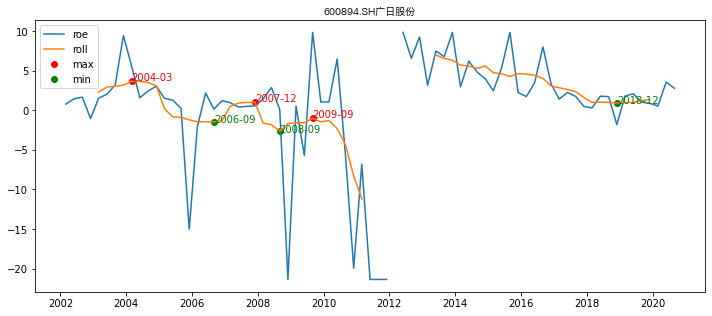

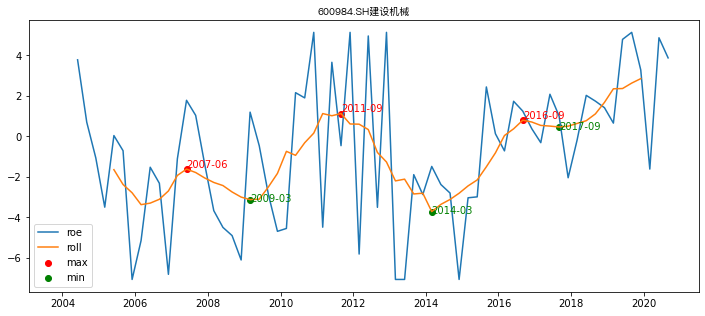

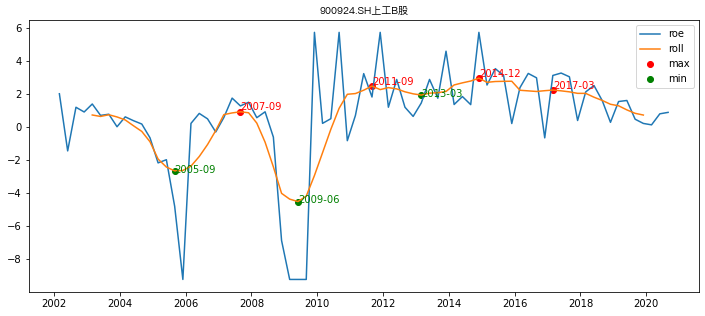

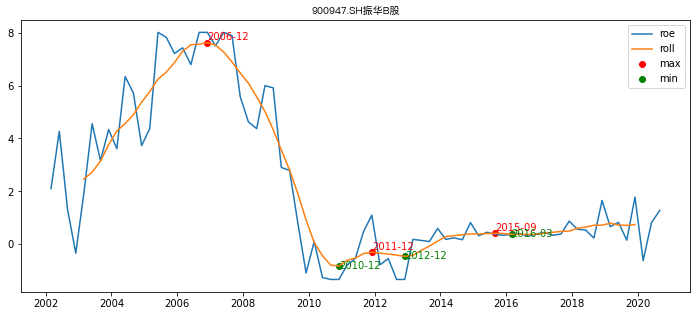

In [7]:
for code in machRoe.code.values:
    tl.showOne(code, machRoe)

## 历史数据检验样本
000039.SZ
- 200312-200909下降
- 201103-now波动下降，中间有极值

000157.SZ
- 200509-200712上升
- 200712-201512下降
- 201512-now上升

000528.SZ
- 201006-201603下降
- 201603-now上升

000680.SZ
- 201009-201512下降
- 201512-201712上升
- 201712-now？高位or上升中？

600031.SH 
- 201012-201512下降
- 201512-now上升

## 容易误判
600320.SH
- 200612-201012下降
- 之后应该是缓慢上升，或一直处于低位，但中间有极大值

900924.SH
- 200906-201109上升
- 之后应该处于高位，但有极小值

In [ ]:
testCodes = ["000039.SZ", "000157.SZ", "000528.SZ", "000680.SZ", "600031.SH"]